# 3.4.2 多元回归———广告收入数据分析

In [1]:
#自变量
    #广告支出：TV、Radio、Newspaper

#因变量
    #商品的销量：Sales：
    
#求解
    #上三个因素对于商品价格的回归模型

#注
    #另有Number一列

### 1 读入数据

In [2]:
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt 
import os
data=pd.read_csv("Advertising.csv",header=0)
data.head()

,Number,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
pd.__version__


'1.2.4'

### 2 数据理解

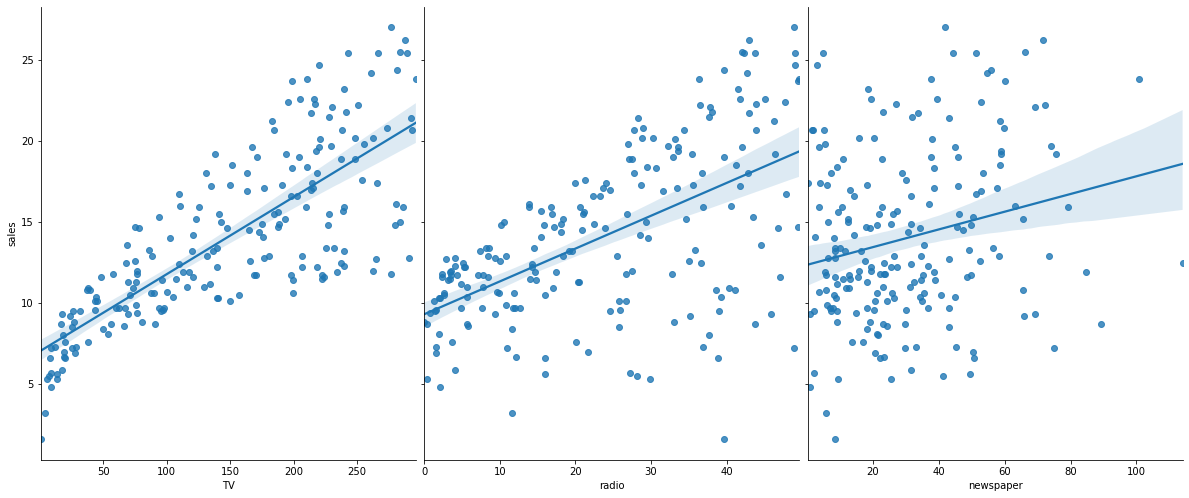

In [4]:
sns.pairplot(data
             , x_vars=['TV','radio','newspaper']
             , y_vars='sales'
             , height=7
             , aspect=0.8
             , kind='reg')  
plt.show()   

In [5]:
sns.pairplot?

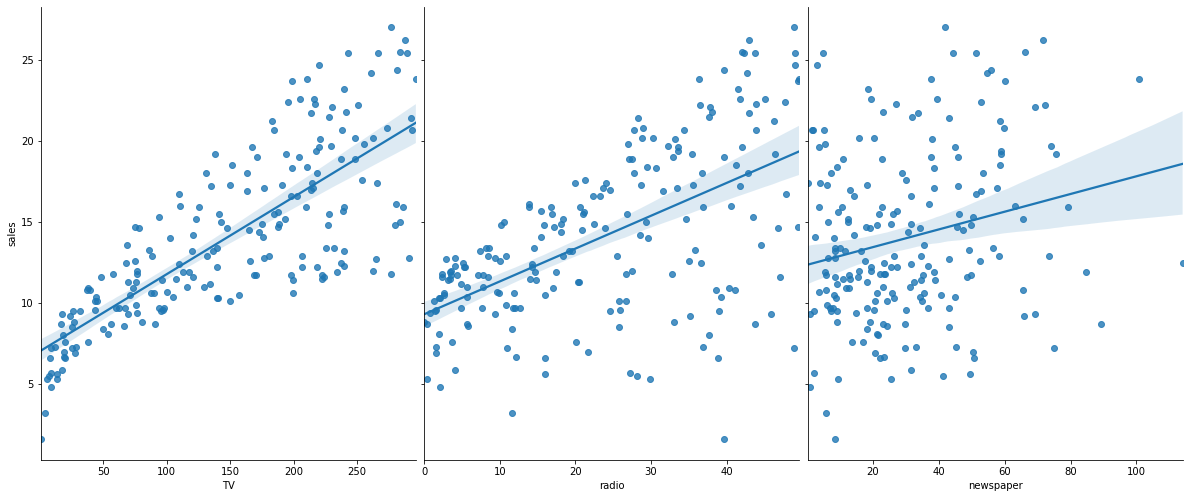

In [6]:
# 重写以上代码，原因：形参数 size变成了height‘
sns.pairplot(data
             , x_vars=['TV','radio','newspaper']
             , y_vars='sales'
             , height=7
             , aspect=0.8
             , kind='reg')  
plt.show()   

### 3 数据准备

In [7]:
#第一步：构建特征矩阵和目标数组
Data=data.drop(['Number','sales'],axis=1)
Data.head()


,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [8]:
sales=data['sales']
type(sales)

pandas.core.series.Series

In [9]:
sales

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [10]:
import numpy as np
sales=np.ravel(sales)
type(sales)

numpy.ndarray

In [11]:
sales

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

### 4 模型构建

In [12]:
#先用统计学方法，然后用机器学习方法
import statsmodels.api as sm
X_add_const=sm.add_constant(Data.to_numpy())
myModel = sm.OLS(sales, X_add_const)
results = myModel.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 29 Oct 2022   Prob (F-statistic):           1.58e-96
Time:                        21:41:40   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [13]:
#第二步，拆分训练集和测试集
import pandas as pd
data=pd.read_csv("Advertising.csv",header=0)
Data=data.drop(['Number','sales'],axis=1)
sales=data['sales']
from sklearn.model_selection import train_test_split    
X_train,X_test, y_train, y_test = train_test_split(Data, sales
                                                   , random_state=1
                                                   ,test_size=0.25)  

In [14]:
train_test_split?

In [15]:
#查看训练数据与测试数据的数量
print(X_train.shape)
print(X_test.shape)

(150, 3)
(50, 3)


In [16]:
from sklearn.linear_model import LinearRegression  
linreg = LinearRegression()  
model=linreg.fit(X_train, y_train)  
print(model)

LinearRegression()


In [17]:
model.coef_

array([0.04656457, 0.17915812, 0.00345046])

In [18]:
model.intercept_

2.87696662231793

In [19]:
#准确率
model.score(X_test, y_test)

0.9156213613792232

### 5 模型预测

In [20]:
y_pred = linreg.predict(X_test)  
y_pred 

array([21.70910292, 16.41055243,  7.60955058, 17.80769552, 18.6146359 ,
       23.83573998, 16.32488681, 13.43225536,  9.17173403, 17.333853  ,
       14.44479482,  9.83511973, 17.18797614, 16.73086831, 15.05529391,
       15.61434433, 12.42541574, 17.17716376, 11.08827566, 18.00537501,
        9.28438889, 12.98458458,  8.79950614, 10.42382499, 11.3846456 ,
       14.98082512,  9.78853268, 19.39643187, 18.18099936, 17.12807566,
       21.54670213, 14.69809481, 16.24641438, 12.32114579, 19.92422501,
       15.32498602, 13.88726522, 10.03162255, 20.93105915,  7.44936831,
        3.64695761,  7.22020178,  5.9962782 , 18.43381853,  8.39408045,
       14.08371047, 15.02195699, 20.35836418, 20.57036347, 19.60636679])

### 6 模型评价

In [21]:
range(len(y_pred))

range(0, 50)

In [22]:
len(y_pred)

50

In [23]:
y_pred

array([21.70910292, 16.41055243,  7.60955058, 17.80769552, 18.6146359 ,
       23.83573998, 16.32488681, 13.43225536,  9.17173403, 17.333853  ,
       14.44479482,  9.83511973, 17.18797614, 16.73086831, 15.05529391,
       15.61434433, 12.42541574, 17.17716376, 11.08827566, 18.00537501,
        9.28438889, 12.98458458,  8.79950614, 10.42382499, 11.3846456 ,
       14.98082512,  9.78853268, 19.39643187, 18.18099936, 17.12807566,
       21.54670213, 14.69809481, 16.24641438, 12.32114579, 19.92422501,
       15.32498602, 13.88726522, 10.03162255, 20.93105915,  7.44936831,
        3.64695761,  7.22020178,  5.9962782 , 18.43381853,  8.39408045,
       14.08371047, 15.02195699, 20.35836418, 20.57036347, 19.60636679])

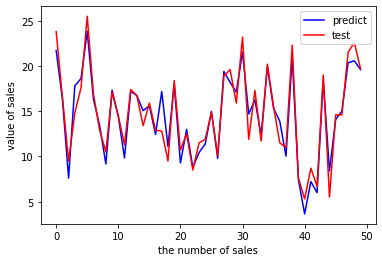

In [24]:
import matplotlib.pyplot as plt  
plt.figure()  
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")  
plt.plot(range(len(y_pred)),y_test,'r',label="test")  
plt.legend(loc="upper right") 
plt.xlabel("the number of sales")  
plt.ylabel('value of sales')  
plt.show()  

# VIF计算

In [25]:
data=pd.read_csv("Advertising.csv",header=0)
data.head()

,Number,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [26]:
X_data=data.drop(['Number','sales'],axis=1)
X_data.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [27]:
from statsmodels.stats.outliers_influence import  variance_inflation_factor
for i in range(3):
    print(X_data.columns[i],"→", variance_inflation_factor(X_data.to_numpy(),i))

TV → 2.486771835198193
radio → 3.285462100162896
newspaper → 3.0552445106573853
